# DSCI 571: Supervised Machine Learning I 

## Lecture 1: Terminology, Baselines, Decision Trees

UBC Master of Data Science program, 2020-21

Instructor: Varada Kolhatkar

## Learning outcomes 

From this lecture, you will be able to 

- differentiate between classification and regression problems;
- explain machine learning terminology such as features, targets, predictions, training, and error;
- use `DummyClassifier` and `DummyRegressor` as baselines for machine learning problems;
- explain the `fit` and `predict` paradigm and use `score` method of ML models; 
- broadly describe how decision tree prediction works;
- use `DecisionTreeClassifier` and `DecisionTreeRegressor` to build decision trees using `scikit-learn`; 
- explain the difference between parameters and hyperparameters; 
- explain the concept of decision boundaries. 

### Lecture outline

1. Terminology
2. Baselines
3. Decision tree classifier
4. Parameters and hyperparameters
5. Decision Tree regressor
6. Summary

In [ ]:
def display_tree(feature_names, tree):
    """ For binary classification only """
    dot = export_graphviz(tree, out_file=None, feature_names=feature_names, class_names=tree.classes_.astype(str), impurity=False)
    # adapted from https://stackoverflow.com/questions/44821349/python-graphviz-remove-legend-on-nodes-of-decisiontreeclassifier
    #dot = re.sub('(\\\\nsamples = [0-9]+)(\\\\nvalue = \[[0-9]+, [0-9]+\])(\\\\nclass = [A-Za-z0-9]+)', '', dot)
    dot = re.sub('(\\\\nsamples = [0-9]+)(\\\\nvalue = \[[0-9]+, [0-9]+\])', '', dot)
    dot = re.sub(     '(samples = [0-9]+)(\\\\nvalue = \[[0-9]+, [0-9]+\])\\\\n', '', dot)
    return graphviz.Source(dot)

## Slide settings 

In [ ]:
# And import the libraries
import os
import re
import sys
from collections import Counter, defaultdict

import IPython

# Plotting
import numpy as np
import pandas as pd
from IPython.display import HTML, display

%matplotlib inline
# pip install git+git://github.com/mgelbart/plot-classifier.git
from plot_classifier import plot_classifier

# Classifiers
## scikit-learn DummyClassifier
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz

# visualization 
import graphviz
import matplotlib.pyplot as plt

plt.rcParams["font.size"] = 16
sys.path.append("code/.")

pd.set_option("display.max_colwidth", 200)

In [ ]:
from pathlib import Path

from traitlets.config.manager import BaseJSONConfigManager

path = Path.home() / ".jupyter" / "nbconfig"
cm = BaseJSONConfigManager(config_dir=str(path))
tmp = cm.update(
    "rise",
    {
        "theme": "serif",
        "transition": "fade",
        "start_slideshow_at": "selected",
        "width": "100%",
        "height": "100%",
        "header": "",
        "footer": "",
        "scroll": True,
        "enable_chalkboard": True,
        "slideNumber": True,
        "center": False,
        "controlsLayout": "edges",
        "slideNumber": True,
        "hash": True,
    },
)

In [ ]:
%%HTML
<style>
.rendered_html table, .rendered_html th, .rendered_html tr, .rendered_html td {
     font-size: 130%;
}

body.rise-enabled div.inner_cell>div.input_area {
    font-size: 100%;
}

body.rise-enabled div.output_subarea.output_text.output_result {
    font-size: 100%;
}
body.rise-enabled div.output_subarea.output_text.output_stream.output_stdout {
  font-size: 150%;
}
</style>

## 1. Terminology <a name="1"></a>

### Tabular data

- How to effectively represent the input?  
- In supervised ML we typically work with "tabular data".    
- Rows are examples. 
- Columns are features (one of the columns is typically the target). 
- Features are relevant characteristics of the problem (usually suggested by experts).  
- To a machine, column names (features) have no meaning. Only feature values and how they vary across examples mean something. 

In [ ]:
# quiz2 classification toy data for predicting quiz2 grade based on previous grades and some other features. 
classification_df = pd.read_csv("data/quiz2-grade-toy-classification.csv")
classification_df.head(4)

In [ ]:
# Tabular data for the housing price prediction problem.
# Download the data from here: https://www.kaggle.com/harlfoxem/housesalesprediction
df = pd.read_csv("data/kc_house_data.csv")
df.drop(["id", "date"], axis=1, inplace=True)
HTML(df.head().to_html(index=False))

In [ ]:
# US Canada cities data 
df = pd.read_csv('data/canada_usa_cities.csv')
df

### Examples, features, targets, and training
You will see a lot of variable terminology in machine learning and statistics. See the MDS terminology resource [here](https://ubc-mds.github.io/resources_pages/terminology/).
Here is some basic terminology used in ML. 
- **examples** = rows = samples = records = instances (usually denoted by $n$)
- **features** = inputs = predictors = explanatory variables = regressors = independent variables = covariates (usually denoted by $d$) 
- **targets** = outputs = outcomes = response variable = dependent variable = labels (if categorical).
- **training** = learning = fitting

<img src="images/sup-ml-terminology.png" height="1000" width="1000"> 


In [ ]:
classification_df.head()

In [ ]:
X = classification_df.drop(columns = ["quiz2"])
y = classification_df["quiz2"]
X.head()

In [ ]:
y.head()


## Questions on terminology

- How many examples and features are there in our liver disease data and the housing price data? (Hint: You can use `df.shape` to get number of rows and columns in a dataframe.) 
- For each of the following examples what would be $X$ and $y$?
    1. Credit risk assessment
    2. Sentiment analysis
    2. Fraud detection 
    3. Face recognition 

### Classification vs. Regression 
Two main kinds of learning problems based on what they are trying to predict
- **Classification problem**: predicting among two or more discrete classes
    - Example1: Predict whether a patient has a liver disease or not
    - Example2: Predict whether a student would get an A+ or not in 571 quiz2.  
- **Regression problem**: predicting a continuous value
    - Example1: Predict housing prices 
    - Example2: Predict a student's score in 571 quiz2.

### Classification vs. Regression example

<img src="images/classification-vs-regression.png" height="1500" width="1500"> 


In [ ]:
# quiz2 classification toy data
classification_df = pd.read_csv("data/quiz2-grade-toy-classification.csv")
classification_df.head(4)

In [ ]:
# quiz2 regression toy data
regression_df = pd.read_csv("data/quiz2-grade-toy-regression.csv")
regression_df.head(4)

### Classification vs Regression questions

Which of these are examples of classification?

1. Predicting the price of a house based on features such as number of bedrooms and the year built.
2. Predicting if a house will sell or not based on features like the price of the house, number of rooms, etc.
3. Predicting your grade in 571 based on past grades.
4. Predicting whether you should bicycle tomorrow or not based on the weather forecast.

## 2. Baselines <a name="2"></a>

### Supervised Learning (Reminder)

- Training data $\rightarrow$ Machine learning algorithm $\rightarrow$ ML model 
- Unseen test data + ML model $\rightarrow$ predictions


<center>
<img src="images/sup-learning.png" height="1200" width="1200"> 
</center>

### Building a simplest machine learning model using `sklearn`

- Baseline: A simple machine learning algorithm based on simple rules of thumb. For example, 
    - most frequent baseline: always predicts the most frequent label in the training set. 
- Baselines provide a way to sanity check your machine learning model.    

### Data

In [ ]:
# Let's use our quiz2 grade prediction toy classification dataset 
classification_df = pd.read_csv("data/quiz2-grade-toy-classification.csv")
classification_df.head(4)

### Create $X$ and $y$

- $X$ &rarr; Feature vectors
- $y$ &rarr; Target

In [ ]:
X = classification_df.drop(columns = ["quiz2"])
y = classification_df["quiz2"]

### Create a classifier or a regressor object

- `import` the appropriate classifier or regressor. 
- Create an object of the classifier or regressor. 

In [ ]:
# scikit-learn DummyClassifier
from sklearn.dummy import DummyClassifier

# Create a classifier object
dummy_clf = DummyClassifier(strategy="most_frequent")

### `fit` the classifier

- The "learning" is carried out when we call `fit` on the classifier object. 

In [ ]:
# fit the classifier
dummy_clf.fit(X, y);

### `predict` the target of given examples

- We can predict the target of examples by calling `predict` on the classifier object. 

In [ ]:
# predict using the learner classifier
dummy_clf.predict(X)

In [ ]:
classification_df['quiz2'].value_counts()

### Scoring your model

- How do you know how well your model is doing?
- For classification problems, `score` gives the accuracy of the model, i.e., proportion of correctly predicted  
    $$accuracy = \frac{\text{correct predictions}}{\text{total examples}}$$
- Sometimes you will also see people reporting error, which is usually $1 - accuracy$ 
- `score` 
    - calls `predict` on `X` 
    - compares predictions with `y` (true targets)
    - returns the accuracy in case of classification.  

In [ ]:
print("The accuracy of the model on the training data: %0.3f" %(dummy_clf.score(X, y)))

In [ ]:
print("The error of the model on the training data: %0.3f" %(1 - dummy_clf.score(X, y)))

### `fit`, `predict` , and `score` summary

Here is the general pattern when we build ML models using `sklearn`

In [ ]:
# Create `X` and `y` from the given data
X = classification_df.drop(columns = ["quiz2"])
y = classification_df["quiz2"]

# Create a class object 
clf = DummyClassifier(strategy="most_frequent")

# Train/fit the model 
clf.fit(X,y)

# Assess the model
clf.score(X,y)

# Predict on some new data using the trained model
new_example = [0,1,92,90,95,93,92]
clf.predict([new_example])

- You'll be exploring dummy classifier in your lab.     

### `DummyRegressor`

- You can also do the same thing for regression problems using `DummyRegressor`. 
- `fit` and `predict` paradigms similar to classification. 
- `score` returns somethings called [$R^2$ score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score). (More on this in 573.)     
    - The maximum $R^2$ is 1 for perfect predictions. 
    - For `DummyRegressor` it returns the mean of the `y` values.   

In [ ]:
# scikit-learn DummyClassifier
from sklearn.dummy import DummyRegressor

# Create `X` and `y` from the given data
X = regression_df.drop(columns = ["quiz2"])
y = regression_df["quiz2"]

# Create a class object 
reg = DummyRegressor()

# Train/fit the model 
reg.fit(X,y)

# Assess the model
reg.score(X,y)

# Predict on some new data using the trained model
new_example = [0,1,92,90,95,93,92]
reg.predict([new_example])

## 3. Decision trees <a name="3"></a>

### Writing a program for prediction 

- Can we do better than the baseline? 
- If you are asked to write a program to predict whether a student gets an A+ or not in quiz2, how would you go for it?  
- For simplicity, let's binarize the feature values. 

<img src="images/quiz2-grade-toy.png" height="1000" width="1000"> 

### A program for prediction using a set of rules with *if else* statements 

<center>
<img src="images/quiz2-grade-toy.png" height="600" width="600"> 
</center>


- How about a rule-based algorithm with a number of *if else* statements?  
    ```
    if class_attendance == 1 and quiz1 == 1:
        quiz2 == "A+"
    elif class_attendance == 1 and lab3 == 1 and lab4 == 1:
        quiz2 == "A+"
    ...
    ```
- How many possible rule combinations there could be with the given 7 binary features? 
    - Gets unwieldy pretty quickly 

### Decision tree algorithm 

- A machine learning algorithm to derive such rules from data in a principled way.  
- Let's `fit` a decision tree using `scikit-learn` and `predict` with it.
- Recall that `scikit-learn` uses the term `fit` for training or learning and uses `predict` for prediction. 

In [ ]:
# Let's binarize our toy dataset for simplicity
classification_df = pd.read_csv("data/quiz2-grade-toy-classification.csv")
X = classification_df.drop(columns = ["quiz2"])
y = classification_df["quiz2"]

X_binary = X.copy()
columns = ["lab1", "lab2", "lab3", "lab4", "quiz1"]
for col in columns:
    X_binary[col] = X_binary[col].apply(
        lambda x: 1 if x >= 90 else 0
    )
X_binary.head()    

In [ ]:
y.head()

### Let's try `DummyClassifier`

- A question for you:
Now that we have binarized the features, would it change `DummyClassifier` predictions? 

In [ ]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_binary, y)
dummy_clf.score(X_binary,y)

### Let's try  `DecisionTreeClassifier` 

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree
model = DecisionTreeClassifier()

# Fit a decision tree
model.fit(X_binary, y)

# Assess the model
model.score(X_binary, y)

The decision tree classifier is giving much higher accuracy than the dummy classifier. That's good news! 

In [ ]:
# Let's visualize the learned model 
display_tree(X_binary.columns, model)

### How does `predict` work? 

In [ ]:
new_example = np.array([[0, 1, 0, 0, 1, 1, 1]])
pd.DataFrame(data = new_example, columns = X.columns)

In [ ]:
pd.DataFrame(data = new_example, columns = X.columns)

In [ ]:
display_tree(X_binary.columns, model)

In [ ]:
# What't the prediction for the new example? 
model.predict(new_example)

### How does `predict` work?
- Given: a learned tree and a test example
- Start at the top of the tree. Ask binary questions at each node and follow the appropriate path in the tree. Once you are at a leaf node, you have the prediction. 
- Note that the model only considers the features which are in the learned tree and  ignores all other features. 

### (optional) How does `fit` work? 

- Which features are most useful for classification? 
- Minimize **impurity** at each question
- Common criteria to minimize impurity: [gini index](https://scikit-learn.org/stable/modules/tree.html#classification-criteria), information gain, cross entropy

In [ ]:
# Let's visualize the tree
display_tree(X_binary.columns, model)

### Decision trees with continuous features

In [ ]:
X.head()

In [ ]:
# Trees with continuous features
model = DecisionTreeClassifier()
model.fit(X, y);
display_tree(X.columns, model)

### Parameters and hyperparameters <a name="4"></a>

- When you call `fit`, a bunch of values get set, like the features to split on and split thresholds. 
- These are called **parameters**.
- But even before calling `fit` on a specific data set, we can set some "knobs" that control the learning.
- These are called **hyperparameters**.

### `max_depth` hyperparameter of decision trees

- `DecisionTreeClassifier` has a number of hyperparameters. 
- Let's explore at the `max_depth` hyperparameter, which controls the **depth** of the decision tree, which is the length of the longest path from the tree root to a leaf. (You'll learn about the tree data structure in 512.)

In scikit-learn, hyperparameters are set in the constructor. 

In [ ]:
model = DecisionTreeClassifier(max_depth=1)
model.fit(X, y);
display_tree(X.columns, model)

A decision tree with only one split (depth=1) is called a **decision stump**. 

In [ ]:
model = DecisionTreeClassifier(max_depth=4)  # Let's try another value for the hyperparameter
model.fit(X, y);
display_tree(X.columns, model)

See [here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) for other hyperparameters of a tree.

### To summarize

- **parameters** are automatically learned by the algorithm during training
- **hyperparameters** are specified based on:
    - expert knowledge
    - heuristics, or 
    - systematic/automated optimization (more on that in the coming lectures)

### Decision boundaries 

- What do we do with learned models? 
    - So far we have been using them to predict the class of a new instance. 
    - Another way to think about them is to ask: what sort of test examples will the model classify as positive, and what sort will it classify as negative? 

In [132]:
## Let's consiser a subset of the data with only two features
X_subset = X[["lab4", "quiz1"]]
X_subset.head()

,lab4,quiz1
0,91,92
1,83,91
2,80,80
3,91,89
4,92,85


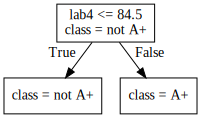

In [133]:
depth = 1 # decision stump
model = DecisionTreeClassifier(max_depth=depth)
model.fit(X_subset, y)
display_tree(X_subset.columns, model)

### Decision boundary

- We assume geometric view of the data. (More on this in lecture 3.)
- Here the red region corresponds to "not A+" class and blue region corresponds to "A+" class. 
- And there is a line separating the red region and the blue region which is called the **decision boundary** of the model.
- In our current model, this decision boundary is created by asking one question `lab4 <= 84.5`. 

<Figure size 288x288 with 0 Axes>

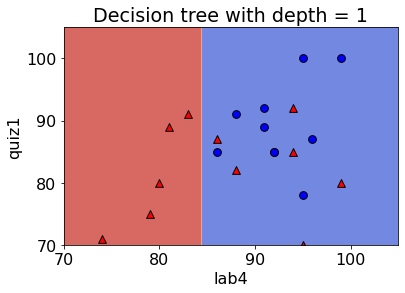

In [134]:
plt.figure(figsize=(4, 4))
plot_classifier(X_subset.to_numpy(), y.to_numpy(), model, ticks=True, lims=(70,105,70,105))
plt.xlabel('lab4')
plt.ylabel('quiz1')
plt.title("Decision tree with depth = %d" %(depth));

### Another example of decision boundary

In [135]:
### US Canada cities data 
df = pd.read_csv('data/canada_usa_cities.csv')
df

,longitude,latitude,country
0,-130.0437,55.9773,USA
1,-134.4197,58.3019,USA
2,-123.0780,48.9854,USA
3,-122.7436,48.9881,USA
4,-122.2691,48.9951,USA
...,...,...,...
204,-72.7218,45.3990,Canada
205,-66.6458,45.9664,Canada
206,-79.2506,42.9931,Canada
207,-72.9406,45.6275,Canada


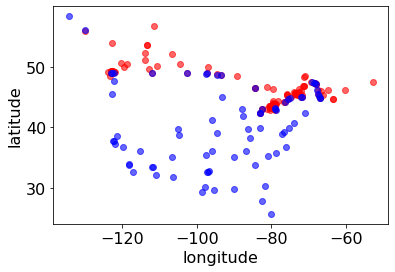

In [137]:
canada = df.query('country == "Canada"')
usa = df.query('country == "USA"')

plt.scatter(canada["longitude"], canada["latitude"], color="red", alpha=0.6)
plt.scatter(usa["longitude"], usa["latitude"], color="blue", alpha=0.6)
plt.ylabel("latitude")
plt.xlabel("longitude");

##### Real boundary between Canada and USA
<img src="images/canada-us-border.jpg" height="500" width="500"> 

[Source](https://sovereignlimits.com/blog/u-s-canada-border-history-disputes)

### Decision Tree Regressor <a name="5"></a>

- We can also use decision tree algorithm for regression. 
- Instead of gini, we use [some other criteria](https://scikit-learn.org/stable/modules/tree.html#mathematical-formulation) for splitting. A common one is mean squared error (MSE). (More on this in the next block.)
- `scikit-learn` supports regression using decision trees with `DecisionTreeRegressor` 
    - `fit` and `predict` paradigms similar to classification
    - `score` returns somethings called [$R^2$ score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score). (More on this in 573.)     
        - The maximum $R^2$ is 1 for perfect predictions. 
        - It can be negative which is very bad (worse than `DummyRegressor`). 


In [138]:
regression_df = pd.read_csv("data/quiz2-grade-toy-regression.csv")
regression_df.head()

,ml_experience,class_attendance,lab1,lab2,lab3,lab4,quiz1,quiz2
0,1,1,92,93,84,91,92,90
1,1,0,94,90,80,83,91,88
2,0,0,78,85,83,80,80,80
3,0,1,91,94,92,91,89,92
4,0,1,77,83,90,92,85,91


/Users/kvarada/opt/miniconda3/envs/571/lib/python3.8/site-packages/sklearn/tree/_classes.py:1254: FutureWarning: the classes_ attribute is to be deprecated from version 0.22 and will be removed in 0.24.
  warnings.warn(msg, FutureWarning)


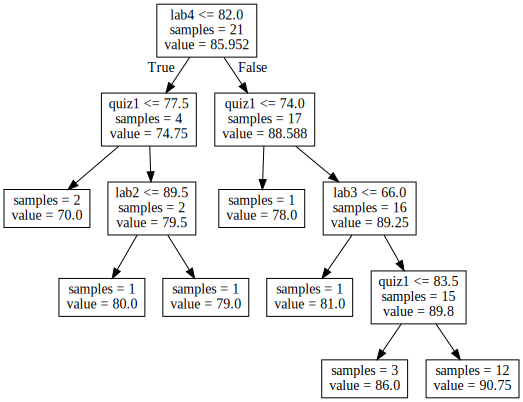

In [139]:
X = regression_df.drop(['quiz2'], axis = 1)
y = regression_df['quiz2']

depth = 4
reg_model = DecisionTreeRegressor(max_depth=depth)
reg_model.fit(X, y)

display_tree(X.columns, reg_model)

In [140]:
reg_model.predict(X)
regression_df['predicted_quiz2'] = reg_model.predict(X)
print("R^2 score on the training data: %0.3f\n\n" %(reg_model.score(X,y)))
regression_df.head()

R^2 score on the training data: 0.895




,ml_experience,class_attendance,lab1,lab2,lab3,lab4,quiz1,quiz2,predicted_quiz2
0,1,1,92,93,84,91,92,90,90.75
1,1,0,94,90,80,83,91,88,90.75
2,0,0,78,85,83,80,80,80,80.00
3,0,1,91,94,92,91,89,92,90.75
4,0,1,77,83,90,92,85,91,90.75


## Revisit: learning outcomes 

From this lecture, you will be able to 

- differentiate between classification and regression problems;
- explain machine learning terminology such as features, targets, predictions, training, and error;
- use `DummyClassifier` and `DummyRegressor` as baselines for machine learning problems;
- explain the `fit` and `predict` paradigm and use `score` method of ML models; 
- broadly describe how decision tree prediction works;
- use `DecisionTreeClassifier` and `DecisionTreeRegressor` to build decision trees using `scikit-learn`; 
- explain the difference between parameters and hyperparameters;
- explain the concept of decision boundaries. 

### Practice exercises (~35 mins) 

- We'll be working on [some practice exercise](https://intro-machine-learning.netlify.app/en/module2) in breakout rooms.
- This is for your practice and **NOT** for credit.
- Work on the following exercises in [Module 2](https://intro-machine-learning.netlify.app/en/module2): 3, 5, 6, 7, 9, 10, 11, 13, 14, 15, 17, 18. 

Some background on the online course above: Hayley, Mike, and I are working on this online (and a bit lighter) version of 571. **Note that this is work in progress and it's in BETA.** If you see any problems, will be great if you can let us know. 